In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_with_desc = pd.read_csv('../data/data_with_desc.csv')
lst_dates = data_with_desc['LST_DATE'].unique()
lst_dates

In [39]:
# Load the headers from the headers.txt file
headers_file = '../data/raw/headers.txt'
with open(headers_file, 'r') as file:
    headers = file.read().strip().split()[1:]  # Skip the column numbers and take the headers
print(headers)
# Load the data from the CRNS0101-05-2021-AK_Aleknagik_1_NNE - Copy.txt file
data_file_2021 = '../data/raw/CRNS0101-05-2021-AK_Aleknagik_1_NNE.txt'
data_file_2022 = '../data/raw/CRNS0101-05-2022-AK_Aleknagik_1_NNE.txt'

# Read the data into DataFrames
data_2021 = pd.read_csv(data_file_2021, sep='\s+', header=None, names=headers)
data_2022 = pd.read_csv(data_file_2022, sep='\s+', header=None, names=headers)

data = pd.concat([data_2021, data_2022])

# Convert appropriate columns to numeric types
numeric_cols = [
    "AIR_TEMPERATURE", "PRECIPITATION", "SOLAR_RADIATION", "SR_FLAG",
    "SURFACE_TEMPERATURE", "ST_FLAG", "RELATIVE_HUMIDITY", "RH_FLAG",
    "SOIL_MOISTURE_5", "SOIL_TEMPERATURE_5", "WETNESS", "WET_FLAG", "WIND_1_5", "WIND_FLAG"
]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

filtered_data = data[data['LST_DATE'].isin(lst_dates)]

# Pivot the DataFrame to get the desired format
air_temp_df = filtered_data.pivot(index="LST_DATE", columns="LST_TIME", values="AIR_TEMPERATURE")
surface_temp_df = filtered_data.pivot(index="LST_DATE", columns="LST_TIME", values='SURFACE_TEMPERATURE')
# sorted_columns =filtered_data.pivot(index="LST_DATE", columns="LST_TIME", values="SURFACE_TEMPERATURE")
# Sort columns to match the desired output format
sorted_columns = sorted(air_temp_df.columns, key=lambda x: int(x))
air_temp_df = air_temp_df[sorted_columns].dropna()
surface_temp_df = surface_temp_df[sorted_columns].dropna()

['UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'CRX_VN', 'LONGITUDE', 'LATITUDE', 'AIR_TEMPERATURE', 'PRECIPITATION', 'SOLAR_RADIATION', 'SR_FLAG', 'SURFACE_TEMPERATURE', 'ST_TYPE', 'ST_FLAG', 'RELATIVE_HUMIDITY', 'RH_FLAG', 'SOIL_MOISTURE_5', 'SOIL_TEMPERATURE_5', 'WETNESS', 'WET_FLAG', 'WIND_1_5', 'WIND_FLAG']


In [37]:
# surface_temp_df.to_csv("../data/surface_temp.csv", index=True)
# surface_temp_df

[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.2 -0.2 -0.2 -0.3 -0.3 -0.4 -0.5 -0.5 -0.6 -0.7 -0.9 -0.9
 -1.  -1.1 -1.1 -1.1 -1.3 -1.4 -1.6 -1.7 -1.9 -2.1 -2.1 -2.  -1.9 -2.
 -2.1 -2.3 -2.4 -2.5 -2.3 -1.9 -1.6 -1.7 -2.2 -2.1 -2.  -1.8 -1.9 -1.9
 -1.8 -1.9 -2.  -1.9 -1.7 -1.2 -1.1 -1.5 -1.8 -2.  -2.1 -1.8 -1.7 -1.6
 -1.6 -1.7 -1.9 -1.8 -1.8 -1.7 -1.6 -1.6 -1.7 -1.6 -1.7 -1.7 -1.7 -1.6
 -1.6 -1.5 -1.4 -1.4 -1.2 -1.1 -0.9 -0.7 -0.7 -0.5 -0.3 -0.4 -0.4 -0.2
 -0.4 -0.6 -0.4 -0.5 -0.4 -0.2 -0.5 -0.6 -0.3 -0.3 -0.4 -0.4 -0.5 -0.4
 -0.4 -0.3 -0.3 -0.1 -0.3 -0.4 -0.6 -0.4 -0.4 -0.4 -0.3 -0.2 -0.3 -0.2
 -0.2 -0.6 -0.3 -0.4 -0.4 -0.7 -0.5 -0.4 -0.2 -0.4 -0.5 -0.4 -0.3 -0.1
 -0.2 -0.3 -0.3 -0.4 -0.4 -0.4 -0.6 -0.6 -0.7 -0.6 -0.6 -0.5 -0.5 -0.7
 -0.7 -

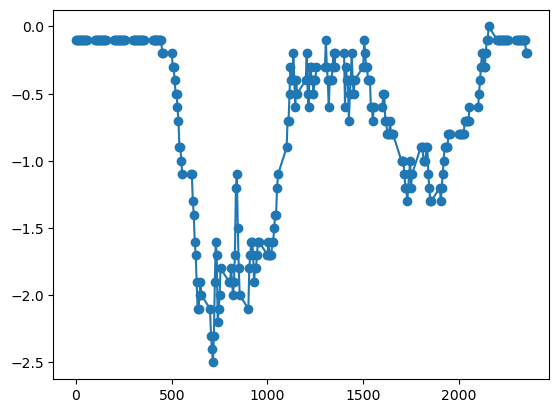

In [40]:
row_to_plot = surface_temp_df.loc[20220401]
print(row_to_plot.values)
plt.plot(row_to_plot.index, row_to_plot.values, marker='o')

In [17]:
import pandas as pd

# Load the data from the two CSV files
data_file = '../data/data.csv'
descriptions_file = '../data/gpt_temperature_descriptions.csv'

# Read the data into DataFrames
data_df = pd.read_csv(data_file)
descriptions_df = pd.read_csv(descriptions_file)

# Ensure the LST_DATE columns are treated as the same data type
data_df['LST_DATE'] = data_df['LST_DATE'].astype(str)
descriptions_df['LST_DATE'] = descriptions_df['LST_DATE'].astype(str)

# Merge the DataFrames on the LST_DATE column
merged_df = pd.merge(data_df, descriptions_df, on='LST_DATE', how='left')

# Move the new descriptions column to the second position
# Assuming the descriptions column is named 'Description' in the descriptions_df
description_col = descriptions_df.columns[1]  # This is the description column name
cols = merged_df.columns.tolist()
cols.insert(1, cols.pop(cols.index(description_col)))
merged_df = merged_df[cols]

# Save the merged DataFrame back to a new CSV file
output_file = '../data/merged_data_with_descriptions.csv'
merged_df.to_csv(output_file, index=False)

output_file

'../data/merged_data_with_descriptions.csv'